# Nejistota bodu histogramu + vliv na $\Delta S/S_0$

In [13]:
# Setup some Jupyter env features
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 16
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

In [15]:
import numpy as np

####################### vstup

# data z picoharpu ve formatu: array(  ) sloupce: jednotlive histogramy -- posledni radek nula
# [data jednotlivych hist, cislo histogramy]
fotkor = np.genfromtxt("axial_EMM_10_03_2020_part2_delim.txt", delimiter="\t")[:,:4] # signal bez MM 

# pomocne promene
fotkor_shape = np.shape(fotkor)

# parametry odecitani foton-korelacnich dat
t_res = [ 256e-12, 256e-12, 256e-12, 256e-12]  # casove rozliseni histogramu v s
t_measure = [150, 150, 150, 150] # doba nacitani dat v s

# casova skala foton-kor. dat
# t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res


Predpokladam, ze $S(t)$ je konstantni. Odhad $\sigma_{\rm hist}$ by mela odpovidat klasickemu odhadu standardni odchylky

In [16]:
hist_sigmas = np.std(fotkor[:-2,:], axis=0)
hist_sigmas

array([222.11458808, 101.43546524, 299.06996084, 631.30673702])

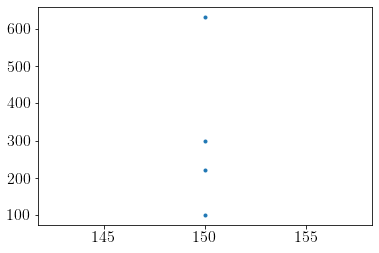

In [17]:
plt.plot(t_measure, hist_sigmas, '.')

In [21]:
from EMM_min_func import get_hist_fit_single

DeltaS_S_ratio = np.zeros(fotkor_shape[1])
Delta_S_S_ratio_sigma = np.zeros(fotkor_shape[1])
# fot_phi = np.zeros(fotkor_shape[1])
# fot_phi_sigma = np.zeros(fotkor_shape[1])
# x = np.zeros((3,fotkor_shape[1]))
# Omega = np.zeros(fotkor_shape[1])
# Omega_sigma = np.zeros(fotkor_shape[1])
# nu = np.zeros(fotkor_shape[1])
# t_scale = np.zeros(fotkor_shape[1])

for i in range(fotkor_shape[1]):
#     get_hist_fit_single(fotkor[:-2,i], t_res, t_measure[i], 0, hist_sigmas[i] )
    DeltaS_S_ratio[i], Delta_S_S_ratio_sigma[i] = get_hist_fit_single(fotkor[:-2,i], t_res[i], t_measure[i], 0, hist_sigmas[i] )
    
print(DeltaS_S_ratio)
print(Delta_S_S_ratio_sigma)

[0.04033839 0.00976944 0.05503211 0.121621  ]
[0.00376963 0.0017709  0.00509037 0.01095741]


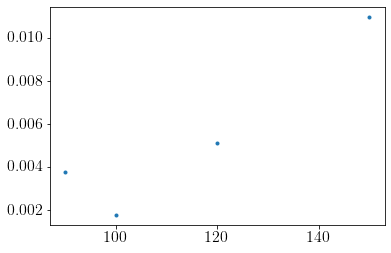

In [83]:
plt.plot(t_measure, Delta_S_S_ratio_sigma, '.')